# Question n°3

Sur l'ensemble des données (de 1968 à 2024) quelle est la répartition pays gagnant en fonction du type de surface du terrain. On ne considère que les matches en simple.

## I. Python brut

In [1]:
for name in list(locals().keys()):
    del locals()[name]

In [2]:
# Librairies
import time
import psutil
import os
import matplotlib.pyplot as plt
import numpy as np

Initialisation du temps

In [3]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

In [4]:
liste_fichier = os.listdir('..\donnees_tennis\ATP')

victoire_simple_homme = []

for fichier in liste_fichier:

    if (fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20')
        or fichier.startswith('atp_matches_futures') or fichier.startswith('atp_matches_qual')):
        chemin = os.path.join("..","donnees_tennis","ATP",str(fichier))

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')
                if l[25] == "F" and l[2] in ["Carpet","Clay","Grass","Hard"]:
                    l_interet = [l[2],l[13]]
                    victoire_simple_homme.append(l_interet)

In [5]:
liste_fichier = os.listdir('..\donnees_tennis\WTA')

victoire_simple_femme = []

for fichier in liste_fichier:

    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20') or fichier.startswith('wta_matches_qual'):
        chemin = os.path.join("..","donnees_tennis","WTA",str(fichier))

        with open(chemin, 'r') as fd:
            for ligne in fd:
                s = ligne.strip('\n')
                l = s.split(',')
                if l[25]=="F" and l[2] in ["Carpet","Clay","Grass","Hard"]:
                    l_interet = [l[2],l[13]]
                    victoire_simple_femme.append(l_interet)

In [6]:
time_telechargement = time.time()

### Traitement

Creation d'un dictionnaire de dictionnaire pour compter le nombre de victoires par pays et par type de surface

Le dictionnaire de niveau 1 à pour clé le type de surface et le dictionnaire de niveau 2
 à pour clé le pays et pour valeur le nombre de victoires par homme, par femme et total.

In [7]:
dictionnaire_victoire = {}

for victoire_homme in victoire_simple_homme:
    # Test de la sufrace (dictionnaire niveau 1)

    # La surface n'est pas une clé création d'un nouveau dictionnaire
    # et on initialise le nombre de victoire à 1 pour l'homme et 0 pour la femme
    if victoire_homme[0] not in dictionnaire_victoire.keys():
        dictionnaire_victoire[victoire_homme[0]] = {}
        dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]] = [1,0]
    # La surface est une clé, on test le pays (dictionnaire niveau 2)
    else :
        # Le pays n'est pas une clé, création d'une nouvelle entrée
        # et on initialise le nombre de victoire à 1 pour l'homme et 0 pour la femme
        if victoire_homme[1] not in dictionnaire_victoire[victoire_homme[0]].keys():
            dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]] = [1,0]
        # Le pays est une clé, on incrémente le nombre de victoire
        # pour l'homme et on laisse le nombre de victoire pour la femme inchangé
        else:
            dictionnaire_victoire[victoire_homme[0]][victoire_homme[1]][0] += 1

# On fait la même chose pour les femmes
for victoire_femme in victoire_simple_femme:
    # Test de la sufrace (dictionnaire niveau 1)

    # La surface n'est pas une clé création d'un nouveau dictionnaire
    # et on initialise le nombre de victoire à 0 pour l'homme et 1 pour la femme
    if victoire_femme[0] not in dictionnaire_victoire.keys():
        print("test")
        dictionnaire_victoire[victoire_femme[0]] = {}
        dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]] = [0,1]
    # La surface est une clé, on test le pays (dictionnaire niveau 2)
    else:
        # Le pays n'est pas une clé, création d'une nouvelle entrée
        # et on initialise le nombre de victoire à 0 pour l'homme et 1 pour la femme
        if victoire_femme[1] not in dictionnaire_victoire[victoire_femme[0]].keys():
            dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]] = [0,1]
        # Le pays est une clé, on incrémente le nombre de victoire
        # pour la femme et on laisse le nombre de victoire pour l'homme inchangé
        else:
            dictionnaire_victoire[victoire_femme[0]][victoire_femme[1]][1] += 1

# Calcul du nombre total de victoire pour chaque pays et chaque surface
for surface in dictionnaire_victoire.keys():
    nb_matches = 0
    for pays in dictionnaire_victoire[surface].keys():
        victoire_tot = sum(dictionnaire_victoire[surface][pays])
        nb_matches += victoire_tot
        # On ajoute le nombre de victoire total au dictionnaire
        dictionnaire_victoire[surface][pays].append(victoire_tot)
    # On ajoute le nombre de match total au dictionnaire
    dictionnaire_victoire[surface]['Stat'] = [nb_matches]

nb_matches_tot = 0
for surface in dictionnaire_victoire.keys():
    nb_matches_tot += dictionnaire_victoire[surface]['Stat'][0]

for surface in dictionnaire_victoire.keys():
    dictionnaire_victoire[surface]['Stat'].append(dictionnaire_victoire[surface]['Stat'][0]/nb_matches_tot*100)


### Récupération des 10 pays les plus représentés par type de surface

In [8]:
dictionnaire_top_10 = {}

for surface in dictionnaire_victoire.keys():
    # Récupération des données hors 'stat'
    data = dictionnaire_victoire[surface].copy()
    del data['Stat']

    # Trier le dictionnaire par le nombre total (le troisième élément de la liste) en ordre décroissant
    sorted_data = sorted(data.items(), key=lambda item: item[1][2], reverse=True)

    # Garder seulement les 10 premiers pays
    dictionnaire_top_10[surface] = dict(sorted_data[:10])

    # Réintégration de la clé 'Stat'
    dictionnaire_top_10[surface]['Stat'] = dictionnaire_victoire[surface]['Stat']


In [9]:
time_traitement = time.time()

### Création de la représentation graphique

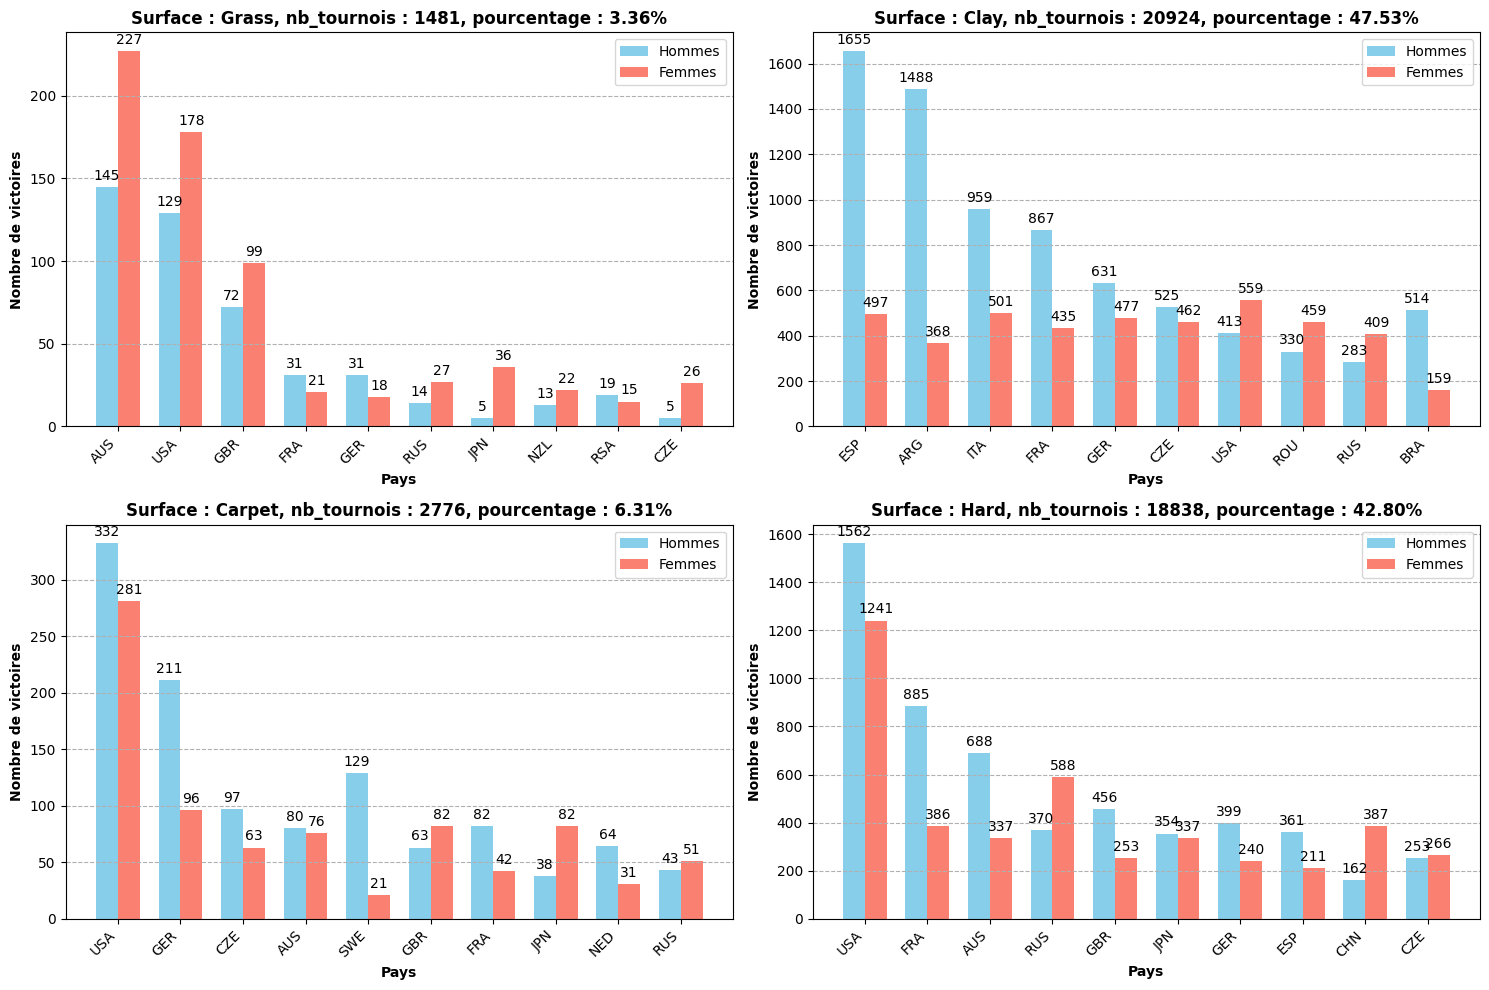

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

for i, surface in enumerate(dictionnaire_top_10.keys()):
    data_surface = dictionnaire_top_10[surface]
    hommes = []
    femmes = []
    pays_labels = []

    for pays in data_surface.keys():
        if pays != 'Stat':
            hommes.append(data_surface[pays][0])
            femmes.append(data_surface[pays][1])
            pays_labels.append(pays)


        else:
            # Récupérer des stats
            nb_match = data_surface['Stat'][0]
            pourcentage = data_surface['Stat'][1]


    # Créer un barplot
    bar_width = 0.35
    index = np.arange(len(pays_labels))
    bar1 = axes[i].bar(index, hommes, bar_width, label='Hommes', color='skyblue')
    bar2 = axes[i].bar(index + bar_width, femmes, bar_width, label='Femmes', color='salmon')

    # Ajouter les labels aux barres pour les hommes
    for rect in bar1:
        height = rect.get_height()
        axes[i].annotate(f'{height}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Ajouter les labels aux barres pour les femmes
    for rect in bar2:
        height = rect.get_height()
        axes[i].annotate(f'{height}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Ajouter la légende
    axes[i].set_xlabel('Pays', fontweight='bold')
    axes[i].set_ylabel('Nombre de victoires', fontweight='bold')
    axes[i].set_title(f'Surface : {surface}, nb_tournois : {nb_match}, pourcentage : {pourcentage:.2f}%', fontweight='bold')
    axes[i].set_xticks(index + bar_width / 2)
    axes[i].set_xticklabels(pays_labels, rotation=45, ha="right")
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--')

fig.tight_layout()

# Enregistrement du graphique
plt.savefig("../Graphiques/graphique_surfaces_pays_pythonbrut.png", dpi=300, bbox_inches='tight')

plt.show()

In [11]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")
print(f"Temps de téléchargement des données : {time_telechargement - notebook_start_time:.2f} secondes")
print(f"Temps de traitement des données : {time_traitement - time_telechargement:.2f} secondes")
print(f"Temps d'affichage des graphiques : {notebook_end_time - time_traitement:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 14.53 secondes
Temps de téléchargement des données : 8.34 secondes
Temps de traitement des données : 0.11 secondes
Temps d'affichage des graphiques : 6.08 secondes


In [12]:
processus = psutil.Process(os.getpid())
info_memoire = processus.memory_info()
rss_mo = info_memoire.rss / (1024 * 1024)  # Resident Set Size (RAM réellement utilisée)
vms_mo = info_memoire.vms / (1024 * 1024)  # Virtual Memory Size (Taille de la mémoire virtuelle)
print(f"Taille de l'ensemble résident (RSS) : {rss_mo:.2f} Mo")
print(f"Taille de la mémoire virtuelle (VMS) : {vms_mo:.2f} Mo")

Taille de l'ensemble résident (RSS) : 146.51 Mo
Taille de la mémoire virtuelle (VMS) : 663.20 Mo


## Pandas

In [13]:
for name in list(locals().keys()):
    del locals()[name]

In [14]:
# Librairies
import time
import psutil
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Initialisation du temps

In [15]:
notebook_start_time = time.time()
print("Début de l'exécution du notebook...")

Début de l'exécution du notebook...


### Récupération des données

### Récupération pour chaque catégorie / sexe du gagnant de chaque tournoi avec son origine

#### Récuperation des données - match simple hommes

In [16]:
matchs_simple_homme = pd.DataFrame()

liste_fichier = os.listdir('..\donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_19') or fichier.startswith('atp_matches_20'):
        data_annee = pd.read_csv('..\donnees_tennis\ATP\\' + fichier)
        # Selection des variables d'intéret
        data_annee = data_annee[["round","surface","winner_ioc"]]
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # On ne garde que les surfaces d'intéret
        data_annee = data_annee[data_annee["surface"].isin(["Carpet","Clay","Grass","Hard"])]

        matchs_simple_homme = pd.concat([matchs_simple_homme, data_annee], axis=0)


#### Récuperation des données - matches espoires

In [17]:
matchs_espoir_homme  = pd.DataFrame()

liste_fichier = os.listdir('..\donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_futures'):
        data_annee = pd.read_csv('..\donnees_tennis\ATP\\' + fichier)
        # Selection des variables d'intéret
        data_annee = data_annee[["round","surface","winner_ioc"]]
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # On ne garde que les surfaces d'intéret
        data_annee = data_annee[data_annee["surface"].isin(["Carpet","Clay","Grass","Hard"])]

        matchs_espoir_homme  = pd.concat([matchs_espoir_homme , data_annee], axis=0)

#### Récuperation des données - matches qualificatifs

In [18]:
matchs_qual_homme  = pd.DataFrame()

liste_fichier = os.listdir('..\donnees_tennis\ATP')
for fichier in liste_fichier:
    if fichier.startswith('atp_matches_qual'):
        data_annee = pd.read_csv('..\donnees_tennis\ATP\\' + fichier)
        # Selection des variables d'intéret
        data_annee = data_annee[["round","surface","winner_ioc"]]
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # On ne garde que les surfaces d'intéret
        data_annee = data_annee[data_annee["surface"].isin(["Carpet","Clay","Grass","Hard"])]

        matchs_qual_homme  = pd.concat([matchs_qual_homme , data_annee], axis=0)

#### Récuperation des données - matches simple femmes

In [19]:
matchs_simple_femme = pd.DataFrame()

liste_fichier = os.listdir('..\donnees_tennis\WTA')
for fichier in liste_fichier:
    if fichier.startswith('wta_matches_19') or fichier.startswith('wta_matches_20'):
        data_annee = pd.read_csv('..\donnees_tennis\WTA\\' + fichier)
        # Selection des variables d'intéret
        data_annee = data_annee[["round","surface","winner_ioc"]]
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # On ne garde que les surfaces d'intéret
        data_annee = data_annee[data_annee["surface"].isin(["Carpet","Clay","Grass","Hard"])]

        matchs_simple_femme = pd.concat([matchs_simple_femme, data_annee], axis=0)

#### Récuperation des données - matches qualification femmes

In [20]:
matchs_qualif_femme = pd.DataFrame()

liste_fichier = os.listdir('..\donnees_tennis\WTA')
for fichier in liste_fichier:
    if fichier.startswith('wta_matches_qual'):
        data_annee = pd.read_csv('..\donnees_tennis\WTA\\' + fichier, low_memory=False)
        # Selection des variables d'intéret
        data_annee = data_annee[["round","surface","winner_ioc"]]
        # Selection des finales
        data_annee = data_annee[data_annee["round"]=="F"]
        # On ne garde que les surfaces d'intéret
        data_annee = data_annee[data_annee["surface"].isin(["Carpet","Clay","Grass","Hard"])]

        matchs_qualif_femme = pd.concat([matchs_qualif_femme, data_annee], axis=0)

In [21]:
time_telechargement = time.time()

### Création d'un dataFrame bilan par sexe

#### Pour ATP

In [22]:
match_bilan_homme = pd.concat([matchs_simple_homme,matchs_espoir_homme, matchs_qual_homme], axis=0)

resultat_homme = match_bilan_homme.groupby('surface')['winner_ioc'].value_counts().reset_index()
resultat_homme = resultat_homme.rename(columns = {"winner_ioc": "nationalite", "count" : "nb_hommes"})

### Pour WTA

In [23]:
match_bilan_femme = pd.concat([matchs_simple_femme,matchs_qualif_femme], axis=0)

resultat_femme = match_bilan_femme.groupby('surface')['winner_ioc'].value_counts().reset_index()
resultat_femme = resultat_femme.rename(columns = {"winner_ioc": "nationalite", "count" : "nb_femmes"})

### Regroupement par surface pour les hommes et les femmes

In [24]:
noms_surface = resultat_homme["surface"].unique()
resultat_graph = {}
stat = {}

for nom_surface in noms_surface:
    homme = resultat_homme[resultat_homme["surface"] == nom_surface].drop("surface", axis=1)
    femme = resultat_femme[resultat_femme["surface"] == nom_surface].drop("surface", axis=1)

    merged_df = pd.merge(homme, femme, on='nationalite')
    merged_df['nb_victoires'] = merged_df['nb_hommes'] + merged_df['nb_femmes']

    stat[nom_surface] = [merged_df['nb_victoires'].sum()]

    merged_df = merged_df.sort_values(by='nb_victoires', ascending=False).head(10)

    resultat_graph[nom_surface] = merged_df

nb_tot_tournoi = 0
for nom_surface in noms_surface:
    nb_tot_tournoi += stat[nom_surface][0]

for nom_surface in noms_surface:
    stat[nom_surface].append(stat[nom_surface][0]/nb_tot_tournoi*100)


In [25]:
time_traitement = time.time()

### Représentation graphique

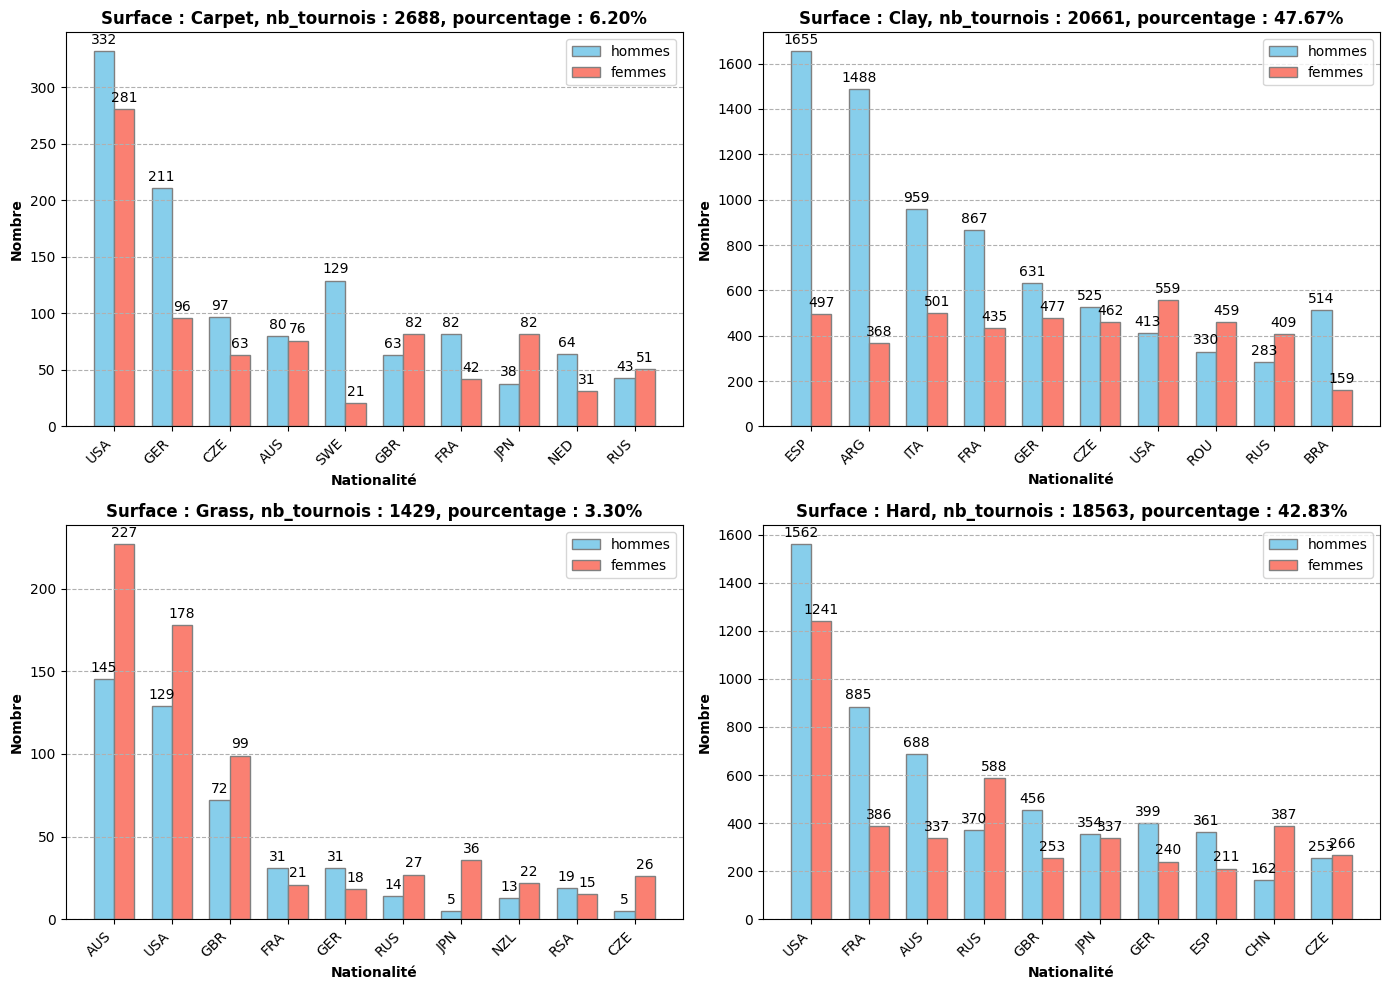

In [27]:
# Liste des clés (noms des surfaces) pour itérer
surfaces = list(resultat_graph.keys())

# Créer une figure avec une disposition de sous-plots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Définir la largeur des barres
bar_width = 0.35

# Itérer sur les surfaces et créer un graphique pour chaque DataFrame
for i, surface in enumerate(surfaces):
    df = resultat_graph[surface]
    ax = axes[i]  # Sélectionner l'axe courant

    # Position des barres pour les hommes
    r1 = np.arange(len(df['nationalite']))
    # Position des barres pour les femmes (décalées par la largeur des barres)
    r2 = [x + bar_width for x in r1]


    # Créer les barres pour les hommes
    rects1 = ax.bar(r1, df['nb_hommes'], color='skyblue', width=bar_width, edgecolor='grey', label='hommes')

    # Ajouter les labels pour les hommes
    for rect in rects1:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points verticalement décalé
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='black')

    # Créer les barres pour les femmes
    rects2 = ax.bar(r2, df['nb_femmes'], color='salmon', width=bar_width, edgecolor='grey', label='femmes')

    # Ajouter les labels pour les femmes
    for rect in rects2:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points verticalement décalé
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='black')



    # Ajouter les étiquettes sur l'axe des x au centre des groupes de barres
    ax.set_xlabel('Nationalité', fontweight='bold')
    ax.set_xticks([r + bar_width/2 for r in range(len(df['nationalite']))])
    ax.set_xticklabels(df['nationalite'], rotation=45, ha='right')

    # Ajouter les étiquettes sur l'axe des y
    ax.set_ylabel('Nombre', fontweight='bold')

    # Ajouter un titre au graphique
    ax.set_title(f'Surface : {surface}, nb_tournois : {stat[surface][0]}, pourcentage : {stat[surface][1]:.2f}%', fontweight='bold')

    # Créer la légende (une seule légende pour chaque subplot)
    ax.legend()

    # Ajouter une grille pour faciliter la lecture
    ax.grid(axis='y', linestyle='--')

# Ajuster la mise en page pour éviter le chevauchement des titres et des étiquettes
plt.tight_layout()

# Enregistrement du graphique
plt.savefig("../Graphiques/graphique_surfaces_pays_pandas.png", dpi=300, bbox_inches='tight')

# Afficher le graphique
plt.show()

Calcul du temps d'exécution

In [28]:
notebook_end_time = time.time()
total_execution_time = notebook_end_time - notebook_start_time
print(f"Fin de l'exécution de la partie Pandas DataFrame.")
print(f"Temps d'exécution total du notebook : {total_execution_time:.2f} secondes")
print(f"Temps de téléchargement des données : {time_telechargement - notebook_start_time:.2f} secondes")
print(f"Temps de traitement des données : {time_traitement - time_telechargement:.2f} secondes")
print(f"Temps d'affichage des graphiques : {notebook_end_time - time_traitement:.2f} secondes")

Fin de l'exécution de la partie Pandas DataFrame.
Temps d'exécution total du notebook : 49.30 secondes
Temps de téléchargement des données : 15.38 secondes
Temps de traitement des données : 0.20 secondes
Temps d'affichage des graphiques : 33.72 secondes


In [29]:
processus = psutil.Process(os.getpid())
info_memoire = processus.memory_info()
rss_mo = info_memoire.rss / (1024 * 1024)  # Resident Set Size (RAM réellement utilisée)
vms_mo = info_memoire.vms / (1024 * 1024)  # Virtual Memory Size (Taille de la mémoire virtuelle)
print(f"Taille de l'ensemble résident (RSS) : {rss_mo:.2f} Mo")
print(f"Taille de la mémoire virtuelle (VMS) : {vms_mo:.2f} Mo")

Taille de l'ensemble résident (RSS) : 355.55 Mo
Taille de la mémoire virtuelle (VMS) : 860.57 Mo
